<a href="https://colab.research.google.com/github/Jin4041/BOJ/blob/main/binaryclassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels)=imdb.load_data(num_words=10000)
#단어 인덱스 매핑
word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
#0-패딩, 1-문서 시작, 2-사전에 없음 => 인덱스-3
decoded_review=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])


In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,]=1.
  return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

y_train=np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")


In [ ]:
#모델 정의
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
#검증 세트 준비
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]


In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

history=model.fit(partial_x_train, partial_y_train,
                  epochs=20,batch_size=512,
                  validation_data=(x_val,y_val))
history_dict=history.history
acc=history_dict['acc']

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 1.0425 - acc: 0.5026 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.6932 - acc: 0.4965 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 3/20
30/30 [==============================] - 1s 50ms/step - loss: 0.6932 - acc: 0.4982 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 4/20
30/30 [==============================] - 2s 52ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 7/20
30/30 [==============================] - 2s 51ms/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 8/20
30/30 [==============================] - 1s 37ms/step - loss: 0.6931 - a

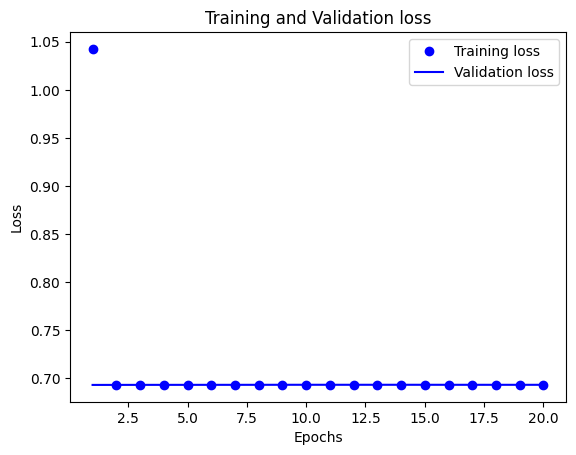

In [ ]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs,loss_values, 'bo', label='Training loss')
plt.plot(epochs,val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

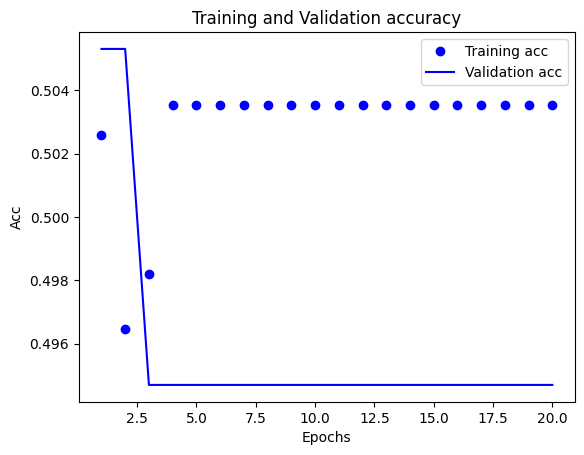

In [ ]:
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc, 'bo', label='Training acc')
plt.plot(epochs,val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
model=keras.Sequential([
    layers.Dense(16,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1,activation="sigmoid"),

])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 24ms/step - loss: 0.8345 - accuracy: 0.4979
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.6932 - accuracy: 0.4969
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.6932 - accuracy: 0.4975
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931474804878235, 0.5]

In [ ]:
model.predict(x_test)